<a href="https://colab.research.google.com/github/VFV-main/Computer-Vision/blob/main/tf_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4)

# Dataset 구조

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices([8,3,0,7,2,1])
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [ ]:
for elem in dataset:
  print(elem.numpy())

8
3
0
7
2
1


In [ ]:
it = iter(dataset)
print(next(it).numpy())

8


In [ ]:
print(dataset.reduce(0,lambda state,value:state+value).numpy())

21


In [ ]:
data = [[20,52],[20,31],[59,21],[5,1]]

In [ ]:
sum(data,[])

[20, 52, 20, 31, 59, 21, 5, 1]

In [ ]:
from itertools import chain
list(chain(*data))

[20, 52, 20, 31, 59, 21, 5, 1]

In [ ]:
np.concatenate(data).tolist()

[20, 52, 20, 31, 59, 21, 5, 1]

In [ ]:
print(*data)

[20, 52] [20, 31] [59, 21] [5, 1]


In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4,10]))
dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

In [ ]:
dataset2 = tf.data.Dataset.from_tensor_slices((tf.random.uniform([4]),tf.random.uniform([4,100],maxval=100,dtype=tf.int32)))
dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

In [ ]:
dataset3 = tf.data.Dataset.zip((dataset1,dataset2))
dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

In [ ]:
dataset4 = tf.data.Dataset.from_tensors(tf.SparseTensor(indices=[[0,0],[1,2]],values=[1,2],dense_shape=[3,4]))
dataset4.element_spec

SparseTensorSpec(TensorShape([3, 4]), tf.int32)

In [ ]:
dataset4.element_spec.value_type

tensorflow.python.framework.sparse_tensor.SparseTensor

In [ ]:
dataset1 = tf.data.Dataset.from_tensor_slices(
    tf.random.uniform([4,10],minval=1,maxval=10,dtype=tf.int32))
dataset1

<TensorSliceDataset shapes: (10,), types: tf.int32>

In [ ]:
for z in dataset1:
  print(z.numpy())

[1 9 9 8 9 3 4 3 5 6]
[3 9 2 9 6 9 4 4 3 7]
[5 7 4 6 2 7 1 5 3 6]
[6 8 8 5 1 9 6 8 8 3]


In [ ]:
dataset2 = tf.data.Dataset.from_tensor_slices((tf.random.uniform([4]),tf.random.uniform([4,100],maxval=100,dtype=tf.int32)))
dataset2

<TensorSliceDataset shapes: ((), (100,)), types: (tf.float32, tf.int32)>

In [ ]:
dataset3 = tf.data.Dataset.zip((dataset1,dataset2))
dataset3

<ZipDataset shapes: ((10,), ((), (100,))), types: (tf.int32, (tf.float32, tf.int32))>

In [ ]:
for a,(b,c) in dataset3:
  print('shapes: {a.shape},{b.shape},{c.shape}'.format(a=a,b=b,c=c))

shapes: (10,),(),(100,)
shapes: (10,),(),(100,)
shapes: (10,),(),(100,)
shapes: (10,),(),(100,)


## Numpy 배열 입력 데이터 읽기

### 1 . tf.Tensor 객체로 변환 후 Dataset.from_tensor_slices() 사용

In [ ]:
train,test = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
images,labels = train
images = images/255

dataset = tf.data.Dataset.from_tensor_slices((images,labels))
dataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

### 제네레이터 사용

from_generater( func , args=[func_param],output_types, output_shapes= (), // output이 가변길이일때는 None )

In [ ]:
def count(stop):
  i=0
  while i<stop:
    yield i
    i+=1
ds_counter = tf.data.Dataset.from_generator(count,args=[25],output_types = tf.int32,output_shapes=(),)

In [ ]:
for count_batch in ds_counter.repeat().batch(10).take(10):
  print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]
[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


In [ ]:
def gen_series():
  i=0
  while True:
    size = np.random.randint(0,10)
    yield i,np.random.normal(size=(size,))
    i+=1

In [ ]:
for i,series in gen_series():
  print(i,':',str(series))
  if i>5:
    break

0 : [-0.1909 -0.1141 -1.0668 -0.3804  0.2511]
1 : [-0.3565 -1.0151  1.009  -0.7844 -0.4614 -0.5361 -0.7944]
2 : [-0.0985 -0.3951  0.6488]
3 : [-1.0055  0.9037 -0.0767 -0.589   0.7579 -1.4306 -0.1707  0.4871]
4 : [ 0.0576 -0.2225  0.0394 -0.067  -0.4904]
5 : [ 2.082   0.8221 -0.0247  0.0501 -0.2318  0.7288 -0.2777  1.7787]
6 : [ 0.5313 -0.5922]


In [ ]:
def sol(data,start,arr):
  i=0
  while True:
    yield start,arr
    start+=1;arr.append(data[start])
for a,b in sol([1,2,3,4],0,[]):
  print(a,':',b)
  if a==3:
    break


0 : []
1 : [2]
2 : [2, 3]
3 : [2, 3, 4]


In [ ]:
ds_series = tf.data.Dataset.from_generator(
    gen_series,
    output_types=(tf.int32,tf.float32),
    output_shapes=((),(None,)))
ds_series

<FlatMapDataset shapes: ((), (None,)), types: (tf.int32, tf.float32)>

In [ ]:
ds_series_batch = ds_series.shuffle(20).padded_batch(10)

ids,sequence_batch = next(iter(ds_series_batch))
print(ids.numpy())
print()
print(sequence_batch.numpy())

[17  0  8 19 11  4  3  5 26 20]

[[-1.4238 -0.1059 -1.4435 -1.7853 -0.6766  1.0336  0.5784 -0.6521  0.    ]
 [-0.6723  1.9622 -1.7503 -0.959  -0.2638 -1.4655  1.0932  1.1139  0.8441]
 [-0.4122 -0.1099  1.2719 -0.8377  0.4725 -0.407  -1.0321  0.0889  0.    ]
 [ 0.6886 -0.4957 -0.5091 -0.0219  0.      0.      0.      0.      0.    ]
 [ 0.4259  0.7906  0.3105 -0.4151 -0.5486  0.6711 -1.1996  0.      0.    ]
 [ 2.0682 -1.0285  0.      0.      0.      0.      0.      0.      0.    ]
 [ 1.5114 -0.2413  0.      0.      0.      0.      0.      0.      0.    ]
 [-0.0669  0.0419  0.4475 -0.3609  0.143  -1.2701  0.4233  0.      0.    ]
 [-0.3261  0.0456  1.6216 -0.5496  1.108   1.9058  0.      0.      0.    ]
 [ 1.2972 -0.4222  0.7771  0.      0.      0.      0.      0.      0.    ]]


In [ ]:
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True
)

228818944/228813984 [==============================] - 3s 0us/step


In [ ]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range=20)
images,labels = next(img_gen.flow_from_directory(flowers))

Found 3670 images belonging to 5 classes.


In [ ]:
print(images.dtype,images.shape)
print(labels.dtype,labels.shape)

float32 (32, 256, 256, 3)
float32 (32, 5)


In [ ]:
ds = tf.data.Dataset.from_generator(
    lambda: img_gen.flow_from_directory(flowers),
    output_types = (tf.float32,tf.float32),
    output_shapes=([32,256,256,3],[32,5])
)
ds.element_spec

(TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(32, 5), dtype=tf.float32, name=None))

In [ ]:
for iamges,labels in ds.take(1):
  print('images.shape: ',images.shape)
  print('labels.shape: ',labels.shape)

Found 3670 images belonging to 5 classes.
images.shape:  (32, 256, 256, 3)
labels.shape:  (32, 5)


### TFRecord 형태

In [ ]:
fsns_test_file = tf.keras.utils.get_file('fsns.tfrec','https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001')

7905280/7904079 [==============================] - 0s 0us/step


In [ ]:
dataset = tf.data.TFRecordDataset(filenames=[fsns_test_file])

In [ ]:
raw_example = next(iter(dataset))
parsed = tf.train.Example.FromString(raw_example.numpy())
parsed.features.feature['image/text']

bytes_list {
  value: "Rue Perreyon"
}

### Text 형태 사용

In [ ]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

file_paths = [
              tf.keras.utils.get_file(file_name,directory_url+file_name)
              for file_name in file_names
]

811008/807992 [==============================] - 0s 0us/step


In [ ]:
dataset = tf.data.TextLineDataset(file_paths)

In [ ]:
for line in dataset.take(5):
  print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


In [ ]:
files_ds = tf.data.Dataset.from_tensor_slices(file_paths)
lines_ds = files_ds.interleave(tf.data.TextLineDataset,cycle_length=3)

for i,line in enumerate(lines_ds.take(9)):
  if i%3==0:
    print()
  print(line.numpy())


b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b"\xef\xbb\xbfOf Peleus' son, Achilles, sing, O Muse,"
b'\xef\xbb\xbfSing, O goddess, the anger of Achilles son of Peleus, that brought'

b'His wrath pernicious, who ten thousand woes'
b'The vengeance, deep and deadly; whence to Greece'
b'countless ills upon the Achaeans. Many a brave soul did it send'

b"Caused to Achaia's host, sent many a soul"
b'Unnumbered ills arose; which many a soul'
b'hurrying down to Hades, and many a hero did it yield a prey to dogs and'


### CSV 형태 사용

In [ ]:
import pandas as pd
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

df = pd.read_csv(titanic_file)
df.head()

32768/30874 [===============================] - 0s 0us/step


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
titanic_slices = tf.data.Dataset.from_tensor_slices(dict(df))
for feature_batch in titanic_slices.take(1):
  for key,value in feature_batch.items():
    print(' {!r:20s}:{}'.format(key,value))

 'survived'          :0
 'sex'               :b'male'
 'age'               :22.0
 'n_siblings_spouses':1
 'parch'             :0
 'fare'              :7.25
 'class'             :b'Third'
 'deck'              :b'unknown'
 'embark_town'       :b'Southampton'
 'alone'             :b'n'


In [ ]:
titanic_batches = tf.data.experimental.make_csv_dataset(titanic_file,batch_size=4,label_name='survived')

In [ ]:
for feature_batch, label_batch in titanic_batches.take(1):
  print("'survived': {}".format(label_batch))
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

'survived': [0 1 0 0]
  'sex'               : [b'male' b'female' b'male' b'female']
  'age'               : [29. 45. 46. 24.]
  'n_siblings_spouses': [1 1 1 0]
  'parch'             : [0 1 0 0]
  'fare'              : [27.7208 26.25   61.175  13.    ]
  'class'             : [b'Second' b'Second' b'First' b'Second']
  'deck'              : [b'unknown' b'unknown' b'E' b'unknown']
  'embark_town'       : [b'Cherbourg' b'Southampton' b'Southampton' b'Southampton']
  'alone'             : [b'n' b'n' b'n' b'y']


### 파일형태

In [ ]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',untar=True)
flowers_root = pathlib.Path(flowers_root)

In [ ]:
for item in flowers_root.glob('*'):
  print(item.name)

dandelion
sunflowers
daisy
roses
LICENSE.txt
tulips


In [ ]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

for f in list_ds.take(5):
  print(f.numpy())

b'/root/.keras/datasets/flower_photos/tulips/5682463466_d3e641cb8b.jpg'
b'/root/.keras/datasets/flower_photos/tulips/16711791713_e54bc9c1af_n.jpg'
b'/root/.keras/datasets/flower_photos/sunflowers/15745084272_36402f5ee6_n.jpg'
b'/root/.keras/datasets/flower_photos/tulips/5691090657_2f1e9bf49e_n.jpg'
b'/root/.keras/datasets/flower_photos/dandelion/4552591312_02fe1dcc04_n.jpg'


In [ ]:
def process_path(file_path):
  label = tf.strings.split(file_path,os.sep)[-2]
  return tf.io.read_file(file_path),label

labeled_ds = list_ds.map(process_path)

In [ ]:
for image_raw,label_text in labeled_ds.take(1):
  print(repr(image_raw.numpy()[:100]))
  print()
  print(label_text.numpy())

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00'

b'roses'


## 데이터 일괄처리

In [ ]:
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0,-100,-1)
dataset = tf.data.Dataset.zip((inc_dataset,dec_dataset))
batched_dataset = dataset.batch(4)

for batch in batched_dataset.take(4):
  print([arr.numpy() for arr in batch])

[array([0, 1, 2, 3]), array([ 0, -1, -2, -3])]
[array([4, 5, 6, 7]), array([-4, -5, -6, -7])]
[array([ 8,  9, 10, 11]), array([ -8,  -9, -10, -11])]
[array([12, 13, 14, 15]), array([-12, -13, -14, -15])]


####tf.data의 기본 설정으로 인해 마지막 배치가 완전하지 않을 수 있으므로 None을 표시할 수 있음

In [ ]:
batched_dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.int64)>

drop_remainder 인수를 사용해 마지막 배치를 무시함

In [ ]:
batched_dataset = dataset.batch(7,drop_remainder=True)
batched_dataset

<BatchDataset shapes: ((7,), (7,)), types: (tf.int64, tf.int64)>

### 패딩 텐서 일괄처리

In [ ]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x:tf.fill([tf.cast(x,tf.int32)],x))
dataset = dataset.padded_batch(4,padded_shapes=(None,))  # None 가변 길이 

In [ ]:
for batch in dataset.take(2):
  print(batch.numpy())
  print()

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



In [ ]:
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic_lines = tf.data.TextLineDataset(titanic_file)

In [ ]:
def plot_batch_sizes(ds):
  batch_sizes = [batch.shape[0] for batch in ds]
  plt.bar(range(len(batch_sizes)), batch_sizes)
  plt.xlabel('Batch number')
  plt.ylabel('Batch size')

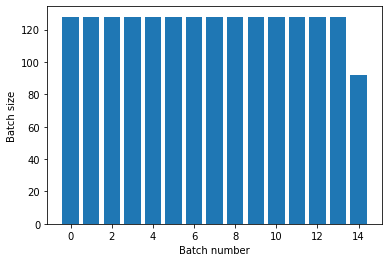

In [ ]:
titanic_batches = titanic_lines.repeat(3).batch(128)
plot_batch_sizes(titanic_batches)

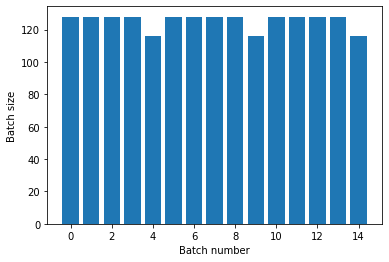

In [ ]:
titanic_batches = titanic_lines.batch(128).repeat(3)
plot_batch_sizes(titanic_batches)

In [ ]:
epochs = 3
dataset = titanic_lines.batch(128)

for epoch in range(epochs):
  for batch in dataset:
    print(batch.shape)
  print('End of epoch: ',epoch)

(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  0
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  1
(128,)
(128,)
(128,)
(128,)
(116,)
End of epoch:  2


### 입력데이터 셔플

buffer_sizes 를 크게할수록 잘 섞이지만 메모리와 시간이 많이 소요되므로  dataset.interleave 를 사용

In [ ]:
lines = tf.data.TextLineDataset(titanic_file)
counter = tf.data.experimental.Counter()

dataset = tf.data.Dataset.zip((counter,lines))
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(20)
dataset

<BatchDataset shapes: ((None,), (None,)), types: (tf.int64, tf.string)>

In [ ]:
n,line_batch = next(iter(dataset))
print(n.numpy())
print(line_batch.numpy())

0
b'survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone'


In [ ]:
dataset = tf.data.Dataset.zip((counter,lines))
shuffled = dataset.shuffle(buffer_size=100).batch(10).repeat(2)

print('Here are the item ID"s near the epoch boundary:\n')
for n,line_batch in shuffled.skip(60).take(5):
  print(n.numpy())

Here are the item ID"s near the epoch boundary:

[273 444 557 534 585 612 522 387 407 592]
[558 288 430 601 353 479 449 581 500 616]
[510 614 507 589 482 508 498 608]
[29  5 31 42 70 26 52 54 34 48]
[  6  14  77  76  37  66  97  65 116  72]


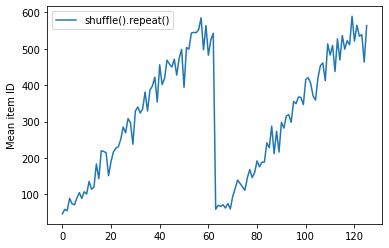

In [ ]:
shuffle_repeat = [n.numpy().mean() for n,line_batch in shuffled]
plt.plot(shuffle_repeat,label='shuffle().repeat()')
plt.ylabel('Mean item ID')
plt.legend()

In [ ]:
dataset = tf.data.Dataset.zip((counter,lines))
shuffled = dataset.repeat(2).shuffle(buffer_size=100).batch(10)

print("Here are the item ID's near the epoch boundary:\n")
for n,line_batch in shuffled.skip(55).take(15):
  print(n.numpy())

Here are the item ID's near the epoch boundary:

[  7  27 516 594 603 513 614 396 625 573]
[586   1 553 524 459 537 595 462   4 540]
[ 31  15 596 162   0 591  38  21  25 565]
[ 48  30 599  47  34 367 592 272 579  28]
[481 588  51  42  14 571  44  45  52 534]
[567 529 606 339  65   6 472 525 605  57]
[ 66  56 569  64  11 612 620 613  46 500]
[ 75  68  60  49  77  61  50 457  92  99]
[ 93  54  69 622 421 469  95  40  97 313]
[ 59 626  67  89 618 547 399 112  27  74]
[ 20  23  13  62 476 582  98 113  37 115]
[609  26  80 176  79 132 118 114  83  85]
[ 58 627 585 143 136 138  16 521  86 580]
[151  96 116  22  90 148 104 601 356 160]
[ 82 478 124 142 128 125  94 600  81 108]


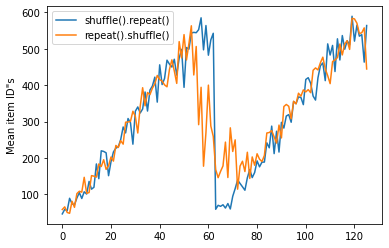

In [ ]:
repeat_shuffle = [n.numpy().mean() for n,line_batch in shuffled]

plt.plot(shuffle_repeat,label='shuffle().repeat()')
plt.plot(repeat_shuffle,label='repeat().shuffle()')
plt.ylabel('Mean item ID"s')
plt.legend()

##  데이터 전처리

In [ ]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [ ]:
def parse_image(filename):
  parts = tf.strings.split(filename, os.sep)
  label = parts[-2]

  image = tf.io.read_file(filename)
  image = tf.image.decode_jpeg(image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, [128, 128])
  return image, label

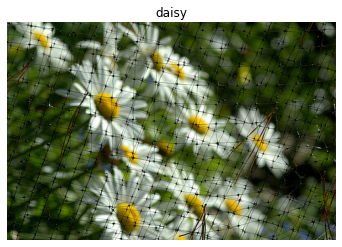

In [ ]:
file_path = next(iter(list_ds))
image,label = parse_image(file_path)
def show(image,label):
  plt.figure()
  plt.imshow(image)
  plt.title(label.numpy().decode('utf-8'))
  plt.axis('off')
show(image,label)

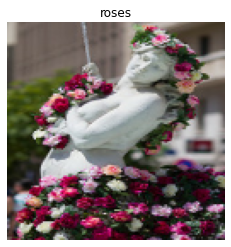

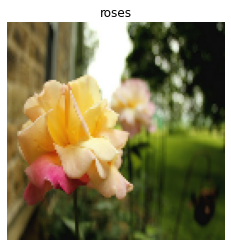

In [ ]:
images_ds = list_ds.map(parse_image)

for image,label in images_ds.take(2):
  show(image,label)

#### 이미지 회전, 확대의 경우 tf.py_function [ scipy.ndimage 함수] 사용

In [ ]:
import scipy.ndimage as ndimage

def random_rotate_image(image):
  image = ndimage.rotate(image,np.random.uniform(-30,30),reshape=False)
  return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


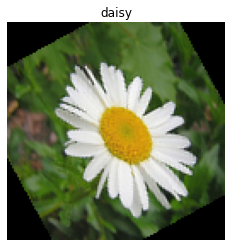

In [ ]:
image,label = next(iter(images_ds))
image = random_rotate_image(image)
show(image,label)

In [ ]:
def tf_random_rotate_image(image,label):
  im_shape = image.shape
  [image,] = tf.py_function(random_rotate_image,[image],[tf.float32])
  image.set_shape(im_shape)
  return image,label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


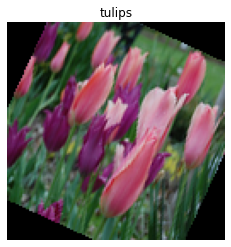

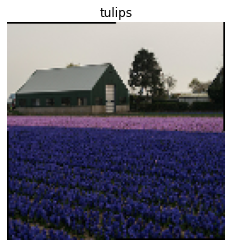

In [ ]:
rot_ds = images_ds.map(tf_random_rotate_image)
for image,label in rot_ds.take(2):
  show(image,label)

#### 리샘플링

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/data/creditcard.zip',
    fname='creditcard.zip',
    extract=True)

csv_path = zip_path.replace('.zip', '.csv')

69156864/69155632 [==============================] - 1s 0us/step


In [ ]:
creditcard_ds = tf.data.experimental.make_csv_dataset(
    csv_path,batch_size=1024,label_name='Class',
    column_defaults=[float()]*30+[int()]
)

In [ ]:
def count(counts,batch):
  features,labels = batch
  class_1 = labels ==1
  class_1 = tf.cast(class_1,tf.int32)

  class_0 = labels == 0
  class_0 = tf.cast(class_0,tf.int32)

  counts['class_0'] += tf.reduce_sum(class_0)
  counts['class_1'] += tf.reduce_sum(class_1)
  return counts

In [ ]:
counts = creditcard_ds.take(10).reduce(initial_state={'class_0':0,'class_1':0},reduce_func=count)
counts = np.array([counts['class_0'].numpy(),counts['class_1'].numpy()]).astype(np.float32)

fractions = counts/counts.sum()
print(fractions)

[0.9956 0.0044]


In [ ]:
negative_ds = (creditcard_ds.unbatch().filter(lambda features,label:label==0).repeat())
positive_ds = (creditcard_ds.unbatch().filter(lambda features,label:label==1).repeat())

In [ ]:
for features,label in positive_ds.batch(10).take(1):
  print(label.numpy())

[1 1 1 1 1 1 1 1 1 1]


#### sample_from_datasets 각각의 클래스에 가중치를 전달하여 사용하여 비중할당

In [ ]:
balanced_ds = tf.data.experimental.sample_from_datasets([negative_ds,positive_ds],[0.5,0.5]).batch(10)

In [ ]:
for features,labels in balanced_ds.take(10):
  print(labels.numpy())

[1 0 1 0 1 0 1 1 1 1]
[1 0 1 0 0 1 0 0 0 0]
[0 1 0 1 1 1 0 1 1 0]
[1 0 1 0 0 1 0 0 1 1]
[1 1 1 0 1 1 0 0 1 1]
[1 1 0 1 0 1 1 1 1 1]
[0 1 1 0 1 0 1 1 0 1]
[0 0 1 0 1 0 0 1 1 1]
[1 0 1 1 1 0 1 0 0 1]
[0 1 0 0 1 1 1 1 1 1]


In [ ]:
#### EX

In [ ]:
train,test = tf.keras.datasets.fashion_mnist.load_data()

images,labels = train
images = images/255.0
labels = labels.astype(np.int32)

In [ ]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images,labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(fmnist_train_ds,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8011 - accuracy: 0.7293
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4712 - accuracy: 0.8414


In [ ]:
model.fit(fmnist_train_ds.repeat(),epochs=2,steps_per_epoch=20)

Epoch 1/2
20/20 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.8500
Epoch 2/2
20/20 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8609


In [ ]:
loss,accuracy = model.evaluate(fmnist_train_ds)
print(loss)
print(accuracy)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4340 - accuracy: 0.8519
0.43398618698120117
0.8518999814987183


In [ ]:
loss,accuracy = model.evaluate(fmnist_train_ds.repeat(),steps=10)
print(loss)
print(accuracy)

10/10 [==============================] - 0s 3ms/step - loss: 0.3410 - accuracy: 0.8844
0.34097743034362793
0.8843749761581421


In [ ]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict_ds,steps=10)
print(result.shape)

(320, 10)


In [ ]:
result = model.predict(fmnist_train_ds,steps=10)
print(result.shape)

(320, 10)
